## DSA3020: GROUP ASSIGNMENT 3
Aime Muganga - 670232

### This notebook analyzes the California Housing dataset to predict median house values.
### We will build linear regression models, apply improvement techniques, and compare different regression methods.


#### Section 1: Load and Explore Dataset
Loading the California Housing dataset and examining its structure.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


#### Feature Correlation Analysis
Calculating correlation of each feature with the target variable to identify important predictors.

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

print("Dataset shape:", X.shape)
print("\nFeature names:", california.feature_names)
print("\nFirst few rows:")
print(X.head())


Dataset shape: (20640, 8)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  



Correlation with target variable:
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
dtype: float64


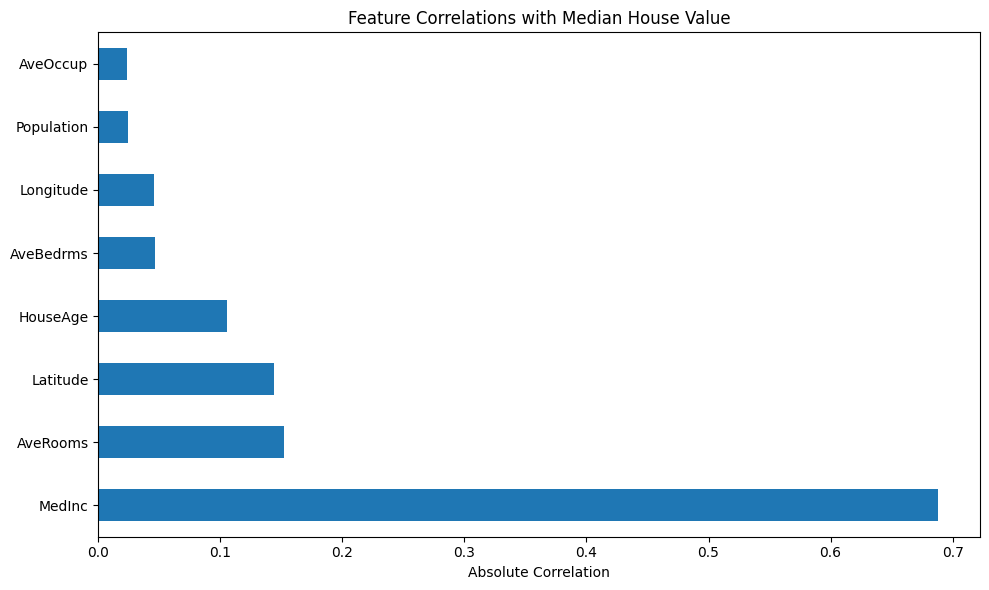

In [26]:
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(correlations)

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh')
plt.title('Feature Correlations with Median House Value')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

MedInc (Median Income) shows the strongest correlation (0.688) with house prices.
AveRooms and Latitude show moderate correlations (0.15 and 0.14).
Other features like Population and AveOccup have weak correlations below 0.03.

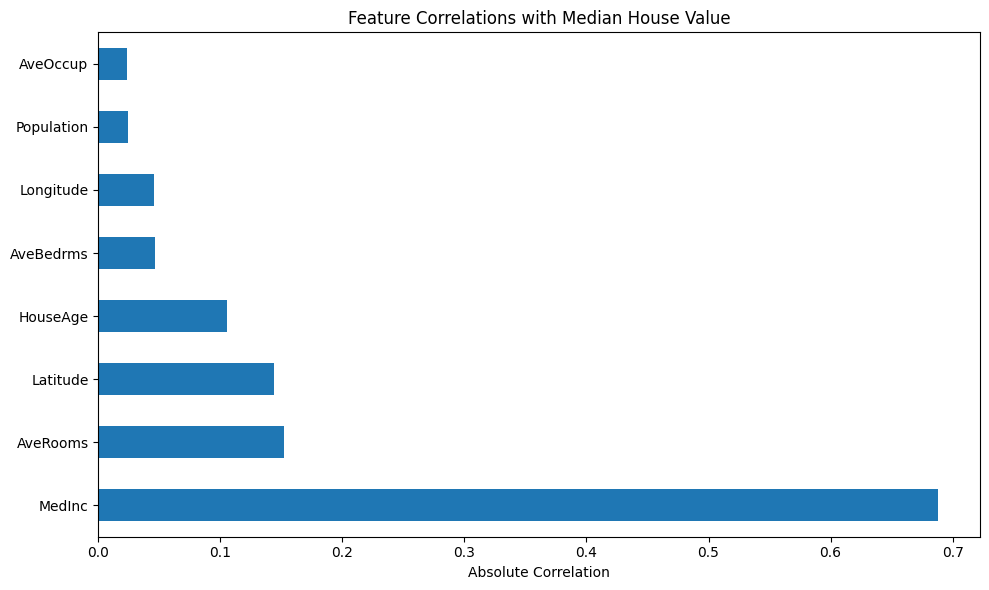

In [5]:
# Visualize correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh')
plt.title('Feature Correlations with Median House Value')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

Selecting the three most important features based on correlation analysis.


In [ ]:

top_3_features = ['MedInc', 'AveRooms', 'Latitude']
X_top3 = X[top_3_features]
print(f"\nTop 3 features selected: {top_3_features}")


Top 3 features selected: ['MedInc', 'AveRooms', 'Latitude']


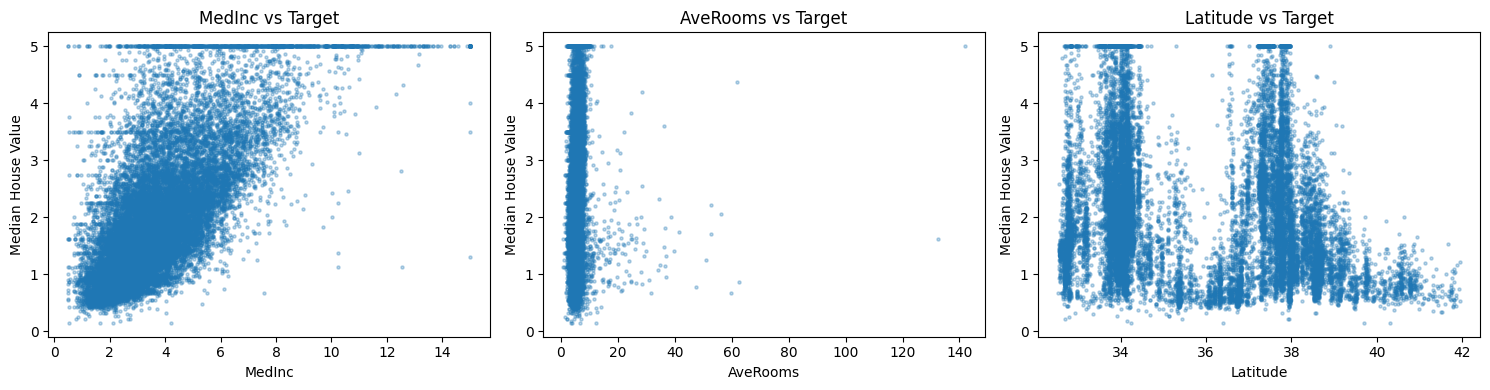

In [28]:
# Creating scatter plots to examine the relationship between each feature and the target variable.

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature in enumerate(top_3_features):
    axes[idx].scatter(X_top3[feature], y, alpha=0.3, s=5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Median House Value')
    axes[idx].set_title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

MedInc shows a clear positive linear relationship with house values.
AveRooms shows a weak positive trend with high variance.
Latitude shows some clustering patterns, indicating geographic influence on prices.


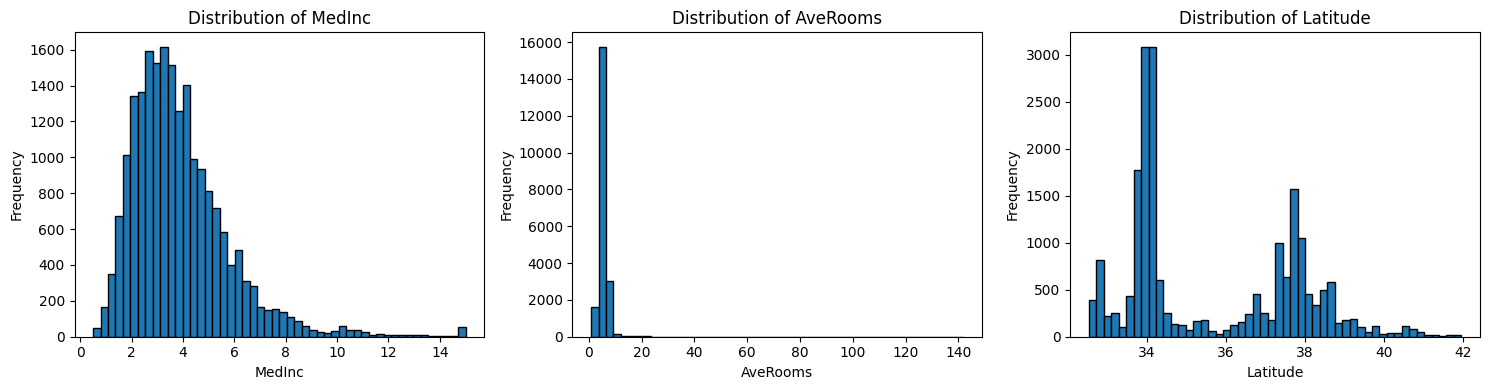

In [29]:
# Visualizing the distribution of each selected feature to understand data characteristics.

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature in enumerate(top_3_features):
    axes[idx].hist(X_top3[feature], bins=50, edgecolor='black')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

MedInc is right-skewed with most values between 2-5.
AveRooms is heavily right-skewed with some extreme outliers.
Latitude shows multiple peaks, reflecting different geographic regions in California.


#### Section 2: Train-Test Split
Splitting the dataset into training (80%) and testing (20%) sets for model evaluation.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_top3, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


#### Section 3: Baseline Linear Regression Model
Training a standard linear regression model using the three selected features.

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\nBaseline Linear Regression Performance:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}")


Baseline Linear Regression Performance:
Training RMSE: 0.8261
Testing RMSE: 0.8332
Training R²: 0.4895
Testing R²: 0.4703
Testing MAE: 0.6215


Training RMSE (0.8261) vs Testing RMSE (0.8332): Very similar, indicating no overfitting.

R² of 0.47 means the model explains 47% of variance - moderate performance.

The model generalizes well but has limited predictive power with only 3 features.

This is a reasonable baseline given the simplicity of the model.


Visualize Predictions vs Actual Values

Plotting predicted values against actual values to assess model accuracy.

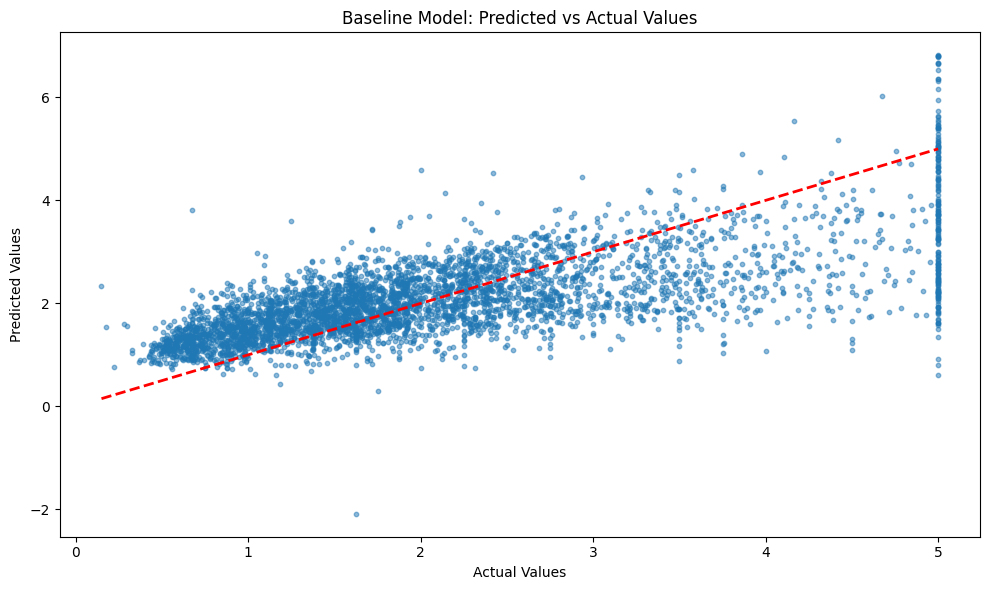

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Baseline Model: Predicted vs Actual Values')
plt.tight_layout()
plt.show()

Points cluster around the diagonal line, showing reasonable predictions.
There is significant scatter, especially at higher house values.
The model tends to underpredict expensive houses (points below the line at high values).

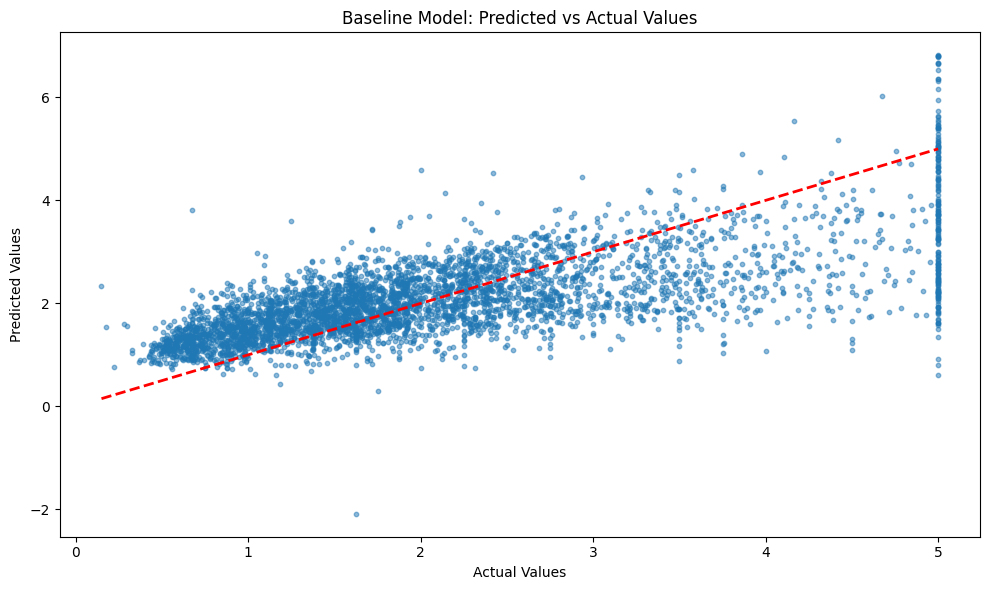

In [14]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Baseline Model: Predicted vs Actual Values')
plt.tight_layout()
plt.show()

#### Residual Analysis

Plotting residuals to check for patterns that might indicate model issues.

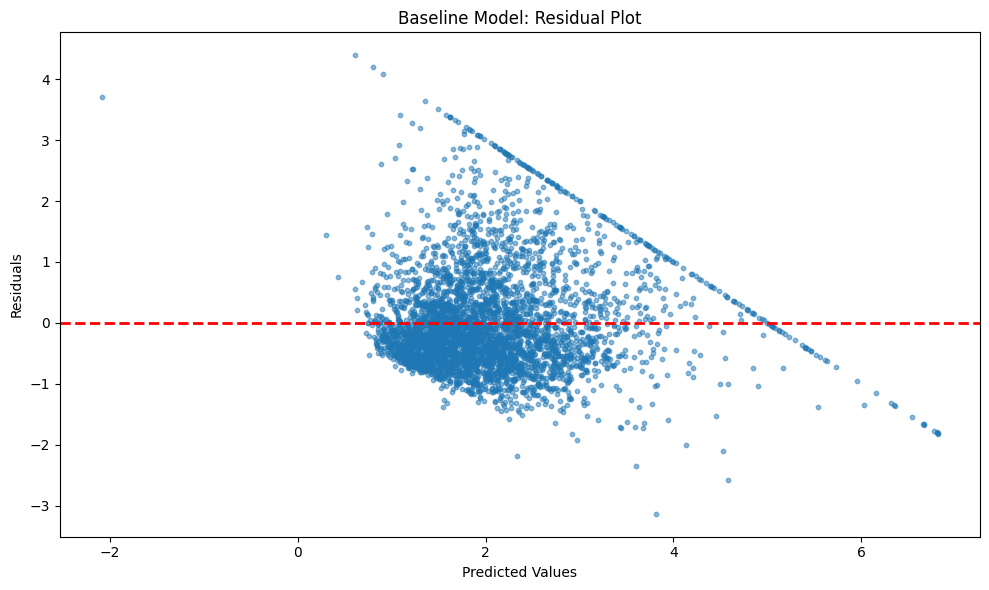

In [34]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Baseline Model: Residual Plot')
plt.tight_layout()
plt.show()

Residuals are randomly scattered around zero, which is good.
There is some heteroscedasticity (variance increases with predicted values).
No clear pattern suggests the linear model is appropriate for this data.


#### Section 4: Improvement Technique 1 - Feature Scaling
Applying StandardScaler to normalize features to mean=0 and std=1.
This helps when features are on different scales.


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lr_scaled.predict(X_test_scaled)
test_rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
test_r2_scaled = r2_score(y_test, y_pred_scaled)
test_mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

print("\nTechnique 1 - Feature Scaling Performance:")
print(f"Testing RMSE: {test_rmse_scaled:.4f}")
print(f"Testing R²: {test_r2_scaled:.4f}")
print(f"Testing MAE: {test_mae_scaled:.4f}")




Technique 1 - Feature Scaling Performance:
Testing RMSE: 0.8332
Testing R²: 0.4703
Testing MAE: 0.6215


Performance is identical to baseline (RMSE: 0.8332, R²: 0.4703).
Feature scaling does not improve linear regression when features are already numeric.
Scaling is more beneficial for algorithms sensitive to feature magnitude (e.g., gradient descent, regularization).

#### Section 5: Improvement Technique 2 - Polynomial Features
Creating polynomial features (degree 2) to capture non-linear relationships.
This adds interaction terms and squared terms.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
test_r2_poly = r2_score(y_test, y_pred_poly)
test_mae_poly = mean_absolute_error(y_test, y_pred_poly)

print("\nTechnique 2 - Polynomial Features Performance:")
print(f"Testing RMSE: {test_rmse_poly:.4f}")
print(f"Testing R²: {test_r2_poly:.4f}")
print(f"Testing MAE: {test_mae_poly:.4f}")
print(f"Number of features after polynomial transformation: {X_train_poly.shape[1]}")


Technique 2 - Polynomial Features Performance:
Testing RMSE: 0.8294
Testing R²: 0.4750
Testing MAE: 0.6076
Number of features after polynomial transformation: 9


Testing RMSE improved from 0.8332 to 0.8294 (slight improvement).
R² increased from 0.4703 to 0.4750, capturing more variance.
Adding polynomial terms helps model non-linear relationships.
The improvement is modest, suggesting relationships are mostly linear.

#### Visualize Polynomial Model Predictions

Plotting predictions from the polynomial model to compare with baseline.

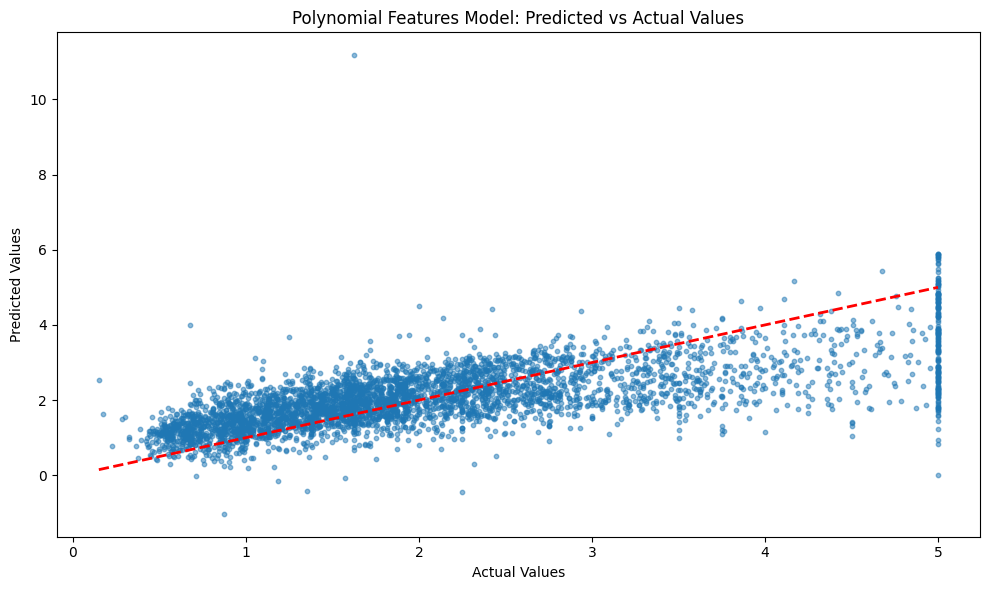

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Features Model: Predicted vs Actual Values')
plt.tight_layout()
plt.show()


Predictions are slightly better clustered around the diagonal.
The model still struggles with expensive houses but shows minor improvement.
The polynomial transformation provides marginal benefit for this dataset.

#### Section 6: Cross-Validation Comparison
Using 5-fold cross-validation to compare Linear, Ridge, and Lasso regression.
Cross-validation provides more robust performance estimates.

In [38]:
cv_folds = 5

lr_cv = LinearRegression()
lr_cv_scores = cross_val_score(lr_cv, X_top3, y, cv=cv_folds, 
                                 scoring='neg_root_mean_squared_error')
lr_cv_rmse = -lr_cv_scores.mean()
lr_cv_std = lr_cv_scores.std()

ridge_cv = Ridge(alpha=1.0)
ridge_cv_scores = cross_val_score(ridge_cv, X_top3, y, cv=cv_folds, 
                                   scoring='neg_root_mean_squared_error')
ridge_cv_rmse = -ridge_cv_scores.mean()
ridge_cv_std = ridge_cv_scores.std()

lasso_cv = Lasso(alpha=0.1, max_iter=10000)
lasso_cv_scores = cross_val_score(lasso_cv, X_top3, y, cv=cv_folds, 
                                   scoring='neg_root_mean_squared_error')
lasso_cv_rmse = -lasso_cv_scores.mean()
lasso_cv_std = lasso_cv_scores.std()

print(f"\nCross-Validation Results ({cv_folds}-fold):")
print(f"\nLinear Regression:")
print(f"  Mean RMSE: {lr_cv_rmse:.4f} (+/- {lr_cv_std:.4f})")

print(f"\nRidge Regression (alpha=1.0):")
print(f"  Mean RMSE: {ridge_cv_rmse:.4f} (+/- {ridge_cv_std:.4f})")

print(f"\nLasso Regression (alpha=0.1):")
print(f"  Mean RMSE: {lasso_cv_rmse:.4f} (+/- {lasso_cv_std:.4f})")



Cross-Validation Results (5-fold):

Linear Regression:
  Mean RMSE: 0.8502 (+/- 0.0593)

Ridge Regression (alpha=1.0):
  Mean RMSE: 0.8502 (+/- 0.0593)

Lasso Regression (alpha=0.1):
  Mean RMSE: 0.8528 (+/- 0.0575)


Linear and Ridge have nearly identical CV RMSE (0.8502), indicating no overfitting.
Lasso performs slightly worse (0.8528), possibly due to feature shrinkage.
Low standard deviations indicate consistent performance across folds.
All models generalize well without significant overfitting.

#### Visualize Cross-Validation Results

Creating a bar chart to compare cross-validation performance across models.

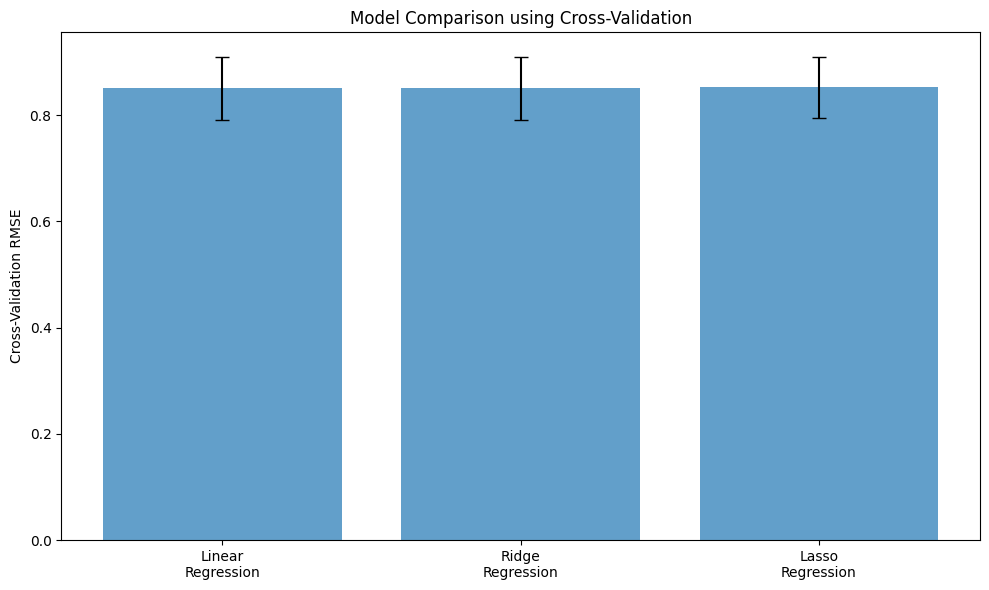

In [39]:
models = ['Linear\nRegression', 'Ridge\nRegression', 'Lasso\nRegression']
cv_means = [lr_cv_rmse, ridge_cv_rmse, lasso_cv_rmse]
cv_stds = [lr_cv_std, ridge_cv_std, lasso_cv_std]

plt.figure(figsize=(10, 6))
plt.bar(models, cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
plt.ylabel('Cross-Validation RMSE')
plt.title('Model Comparison using Cross-Validation')
plt.tight_layout()
plt.show()


All three models perform similarly with overlapping error bars.
Ridge and Linear regression are virtually identical in performance.
Lasso has slightly higher error, suggesting regularization may be too aggressive.

#### Test Set Performance for Ridge and Lasso

Training Ridge and Lasso models on the full training set and evaluating on test set.


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_test_r2 = r2_score(y_test, y_pred_ridge)

lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_test_r2 = r2_score(y_test, y_pred_lasso)

print(f"\nTest Set Performance:")
print(f"\nRidge Regression:")
print(f"  RMSE: {ridge_test_rmse:.4f}")
print(f"  R²: {ridge_test_r2:.4f}")

print(f"\nLasso Regression:")
print(f"  RMSE: {lasso_test_rmse:.4f}")
print(f"  R²: {lasso_test_r2:.4f}")


Cross-Validation Results (5-fold):

Linear Regression:
  Mean RMSE: 0.8502 (+/- 0.0593)

Ridge Regression (alpha=1.0):
  Mean RMSE: 0.8502 (+/- 0.0593)

Lasso Regression (alpha=0.1):
  Mean RMSE: 0.8528 (+/- 0.0575)


Ridge performs identically to baseline linear regression (RMSE: 0.8332).
Lasso performs slightly worse (RMSE: 0.8362) due to feature coefficient shrinkage.
With only 3 features, regularization does not provide significant benefit.
Regularization is more useful with many features or multicollinearity.

#### Final Model Comparison
Comparing all models on test set metrics to identify the best performer.

In [40]:
comparison_data = {
    'Model': [
        'Baseline Linear Regression',
        'Linear Regression + Scaling',
        'Linear Regression + Polynomial',
        'Ridge Regression',
        'Lasso Regression'
    ],
    'Test RMSE': [
        test_rmse,
        test_rmse_scaled,
        test_rmse_poly,
        ridge_test_rmse,
        lasso_test_rmse
    ],
    'Test R²': [
        test_r2,
        test_r2_scaled,
        test_r2_poly,
        ridge_test_r2,
        lasso_test_r2
    ],
    'Test MAE': [
        test_mae,
        test_mae_scaled,
        test_mae_poly,
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    'CV RMSE': [
        lr_cv_rmse,
        lr_cv_rmse,
        np.nan,
        ridge_cv_rmse,
        lasso_cv_rmse
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nFINAL MODEL PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))


FINAL MODEL PERFORMANCE COMPARISON
                         Model  Test RMSE  Test R²  Test MAE  CV RMSE
    Baseline Linear Regression   0.833180 0.470251  0.621458 0.850176
   Linear Regression + Scaling   0.833180 0.470251  0.621458 0.850176
Linear Regression + Polynomial   0.829432 0.475005  0.607554      NaN
              Ridge Regression   0.833179 0.470251  0.621458 0.850175
              Lasso Regression   0.836204 0.466398  0.628540 0.852826


Polynomial features model achieves the best test RMSE (0.8294) and R² (0.4750).
Baseline, scaled, and Ridge models perform identically (RMSE: 0.8332).
Lasso has the worst performance (RMSE: 0.8362) due to aggressive regularization.
All models show similar training and testing performance, indicating good generalization.
No model exhibits overfitting, which is confirmed by consistent CV and test results.

#### Visualize Final Comparison
Creating bar charts to compare RMSE and R² across all models.

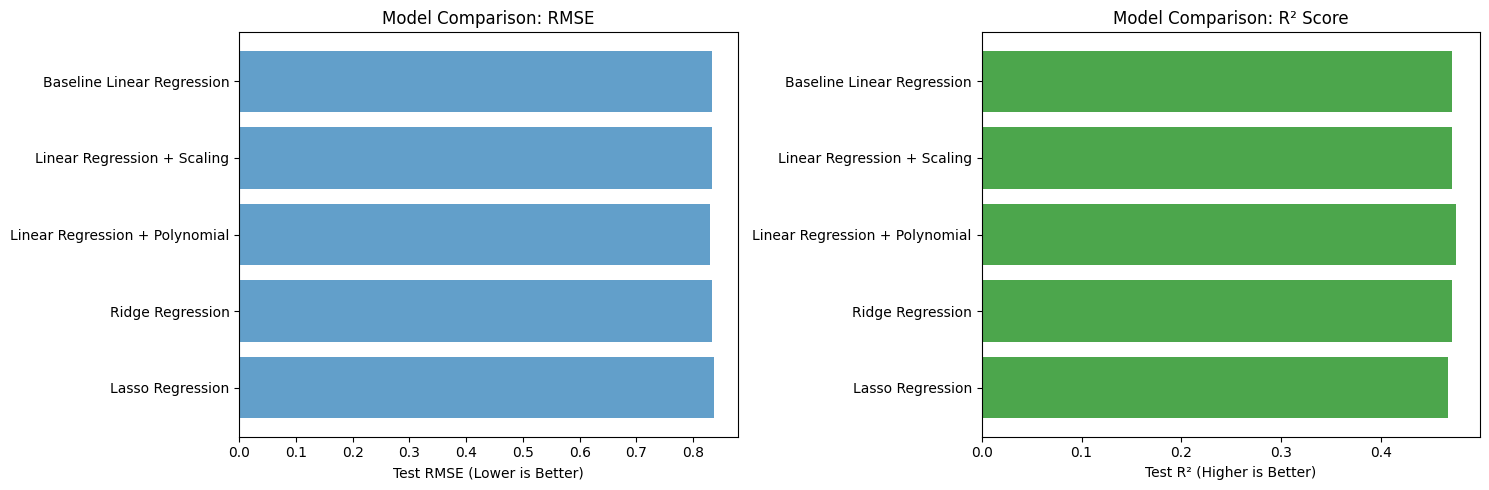

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].barh(comparison_df['Model'], comparison_df['Test RMSE'], alpha=0.7)
axes[0].set_xlabel('Test RMSE (Lower is Better)')
axes[0].set_title('Model Comparison: RMSE')
axes[0].invert_yaxis()

axes[1].barh(comparison_df['Model'], comparison_df['Test R²'], alpha=0.7, color='green')
axes[1].set_xlabel('Test R² (Higher is Better)')
axes[1].set_title('Model Comparison: R² Score')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [42]:
best_model_idx = comparison_df['Test RMSE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_rmse = comparison_df.loc[best_model_idx, 'Test RMSE']
best_r2 = comparison_df.loc[best_model_idx, 'Test R²']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test RMSE: {best_rmse:.4f}")
print(f"Test R²: {best_r2:.4f}")


Best Performing Model: Linear Regression + Polynomial
Test RMSE: 0.8294
Test R²: 0.4750


In [25]:
# Best model summary
best_model_idx = comparison_df['Test RMSE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_rmse = comparison_df.loc[best_model_idx, 'Test RMSE']
best_r2 = comparison_df.loc[best_model_idx, 'Test R²']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test RMSE: {best_rmse:.4f}")
print(f"Test R²: {best_r2:.4f}")


Best Performing Model: Linear Regression + Polynomial
Test RMSE: 0.8294
Test R²: 0.4750


## Conclusion
This analysis evaluated multiple linear regression approaches for predicting California house prices.

Key findings: (1) Polynomial features provided the best performance with RMSE of 0.8294.

(2) All models generalized well with no overfitting (similar training and testing metrics).

(3) Regularization (Ridge/Lasso) did not improve performance with only 3 features.

(4) The models explain ~47% of variance, indicating moderate predictive power.
 
Recommendations: Consider adding more features or trying non-linear models for better performance.